# LAB | Hyperparameter Tuning

**Load the data**

Finally step in order to maximize the performance on your Spaceship Titanic model.

The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

So far we've been training and evaluating models with default values for hyperparameters.

Today we will perform the same feature engineering as before, and then compare the best working models you got so far, but now fine tuning it's hyperparameters.

In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
spaceship.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
spaceship.isnull().sum()


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
spaceship_clean = spaceship.dropna()


In [6]:
# Extract the deck component from the Cabin column
spaceship_clean['Deck'] = spaceship_clean['Cabin'].str[0]

# Now that we have the Deck, drop the original Cabin column
spaceship_clean = spaceship_clean.drop(columns=['Cabin'])

# Check unique values to ensure we have the desired {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}
print(spaceship_clean['Deck'].unique())

['B' 'F' 'A' 'G' 'E' 'C' 'D' 'T']


C:\Users\Laura Ortiz\AppData\Local\Temp\ipykernel_21732\2072740189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spaceship_clean['Deck'] = spaceship_clean['Cabin'].str[0]


Now perform the same as before:
- Feature Scaling
- Feature Selection


In [7]:
#your code here
# Drop PassengerId and Name
spaceship_clean = spaceship_clean.drop(columns=['PassengerId', 'Name'])

# Convert CryoSleep and VIP into numerical format
spaceship_clean['CryoSleep'] = spaceship_clean['CryoSleep'].astype(int)
spaceship_clean['VIP'] = spaceship_clean['VIP'].astype(int)

# Perform one-hot encoding on categorical columns
# Columns that need to be encoded: HomePlanet, Destination, Deck
spaceship_clean = pd.get_dummies(spaceship_clean, columns=['HomePlanet', 'Destination', 'Deck'], drop_first=True)

In [8]:
#your code here

x = spaceship_clean.drop(columns=['Transported'])
y = spaceship_clean['Transported']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
# normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [10]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- Now let's use the best model we got so far in order to see how it can improve when we fine tune it's hyperparameters.

In [11]:
#your code here
# Crear y entrenar el modelo de Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_norm, y_train)

# Predicción
y_pred_rf = rf_clf.predict(X_test_norm)


- Evaluate your model

In [12]:
#your code here
# Evaluate the model
rf_accuracy_norm = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy de Random Forest: {rf_accuracy_norm}")
print("Reporte de clasificación para Random Forest datos normalizados:\n")
print(classification_report(y_test, y_pred_rf))

Accuracy de Random Forest: 0.8116490166414524
Reporte de clasificación para Random Forest datos normalizados:

              precision    recall  f1-score   support

       False       0.80      0.82      0.81       653
        True       0.82      0.80      0.81       669

    accuracy                           0.81      1322
   macro avg       0.81      0.81      0.81      1322
weighted avg       0.81      0.81      0.81      1322



In [13]:
# Predicción en el conjunto de entrenamiento
y_train_pred_rf = rf_clf.predict(X_train_norm)

# Evaluación en conjunto de entrenamiento
rf_train_accuracy = accuracy_score(y_train, y_train_pred_rf)
print(f"Accuracy en el conjunto de entrenamiento: {rf_train_accuracy}")

# Evaluación en conjunto de prueba (que ya calculaste antes)
print(f"Accuracy en el conjunto de prueba: {rf_accuracy_norm}")

Accuracy en el conjunto de entrenamiento: 0.9401968205904617
Accuracy en el conjunto de prueba: 0.8116490166414524


**Grid/Random Search**

For this lab we will use Grid Search.

- Define hyperparameters to fine tune.

In [14]:
#your code here

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Configurar el modelo Random Forest
rf_clf = RandomForestClassifier(random_state=42)

# Configurar Grid Search con validación cruzada (cv=5)
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

- Run Grid Search

In [15]:
# Ejecutar Grid Search
grid_search.fit(X_train_norm, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mejores hiperparámetros encontrados:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


- Evaluate your model

In [19]:
# Mejor modelo encontrado por Grid Search
best_rf_clf = grid_search.best_estimator_

# Predicción con el conjunto de prueba
y_pred_best_rf = best_rf_clf.predict(X_test_norm)

# Evaluación del rendimiento
best_rf_accuracy = accuracy_score(y_test, y_pred_best_rf)
print(f"Accuracy del mejor modelo de Random Forest (Grid Search): {best_rf_accuracy}")

# Reporte de clasificación para el mejor modelo
print("Reporte de clasificación para el mejor modelo de Random Forest:\n")
print(classification_report(y_test, y_pred_best_rf))

Accuracy del mejor modelo de Random Forest (Grid Search): 0.813161875945537
Reporte de clasificación para el mejor modelo de Random Forest:

              precision    recall  f1-score   support

       False       0.81      0.81      0.81       653
        True       0.82      0.81      0.82       669

    accuracy                           0.81      1322
   macro avg       0.81      0.81      0.81      1322
weighted avg       0.81      0.81      0.81      1322



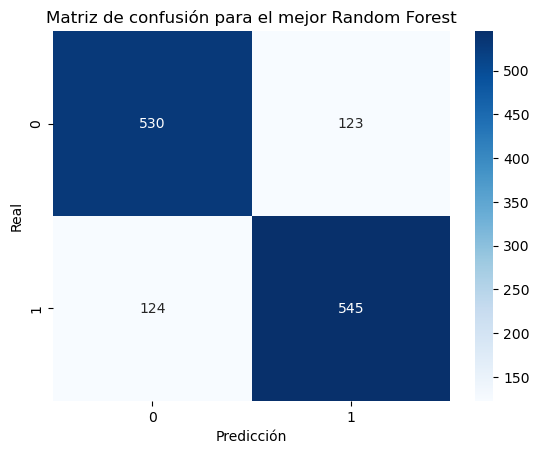

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión para el mejor Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [21]:
# Predicción en el conjunto de entrenamiento con el mejor modelo
y_train_pred_best_rf = best_rf_clf.predict(X_train_norm)

# Calcular el accuracy en el conjunto de entrenamiento
best_rf_train_accuracy = accuracy_score(y_train, y_train_pred_best_rf)
print(f"Accuracy en el conjunto de entrenamiento: {best_rf_train_accuracy}")

# Accuracy en el conjunto de prueba (ya calculado anteriormente)
print(f"Accuracy en el conjunto de prueba: {best_rf_accuracy}")

Accuracy en el conjunto de entrenamiento: 0.8652535957607873
Accuracy en el conjunto de prueba: 0.813161875945537
